In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [2]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel['prize']))
# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

In [3]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = np.floor(nobel['year']).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1901,0.000000
1,1902,0.000000
2,1903,0.000000
3,1904,0.000000
4,1905,0.000000
...,...,...
108,2012,0.500000
109,2013,0.384615
110,2014,0.230769
111,2015,0.090909


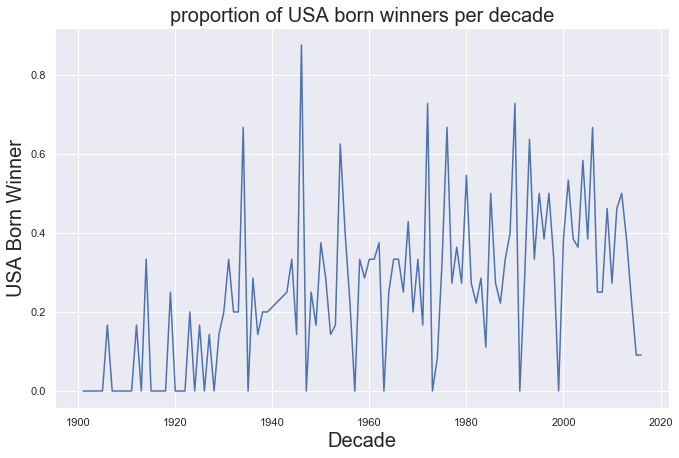

In [11]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x= 'decade', y='usa_born_winner', data=prop_usa_winners)
plt.xlabel('Decade', size=20)
plt.ylabel('USA Born Winner', size=20)
plt.title('proportion of USA born winners per decade', size= 20)
plt.show()

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

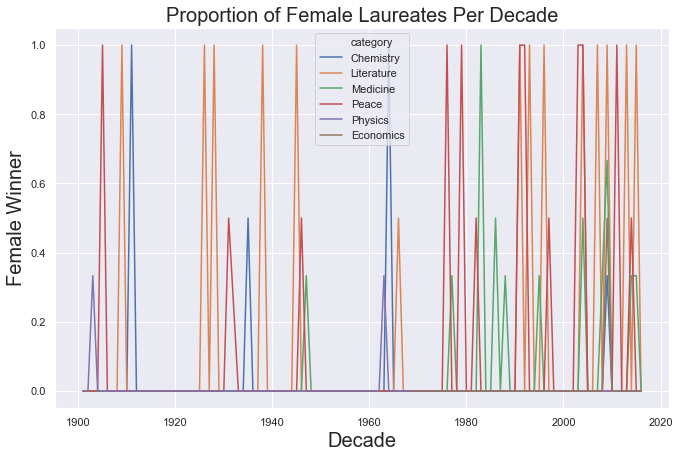

In [12]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index = False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# Plotting USA born winners 
ax = sns.lineplot(x= 'decade', y='female_winner', data=prop_female_winners, hue = 'category')
plt.xlabel('Decade', size=20)
plt.ylabel('Female Winner', size=20)
plt.title('Proportion of Female Laureates Per Decade', size= 20)
plt.show()

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [6]:
# Picking out the first woman to win a Nobel Prize
Females = nobel[nobel['sex'] == 'Female']
Females.nsmallest(1, 'female_winner')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903,True


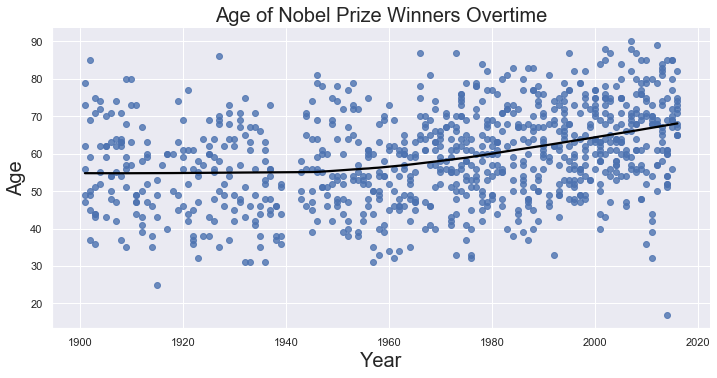

In [14]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x= 'year', y= 'age', data= nobel, lowess=True, aspect=2, line_kws={'color':'black'} )
plt.xlabel('Year', size=20)
plt.ylabel('Age', size=20)
plt.title('Age of Nobel Prize Winners Overtime', size= 20)
plt.show()

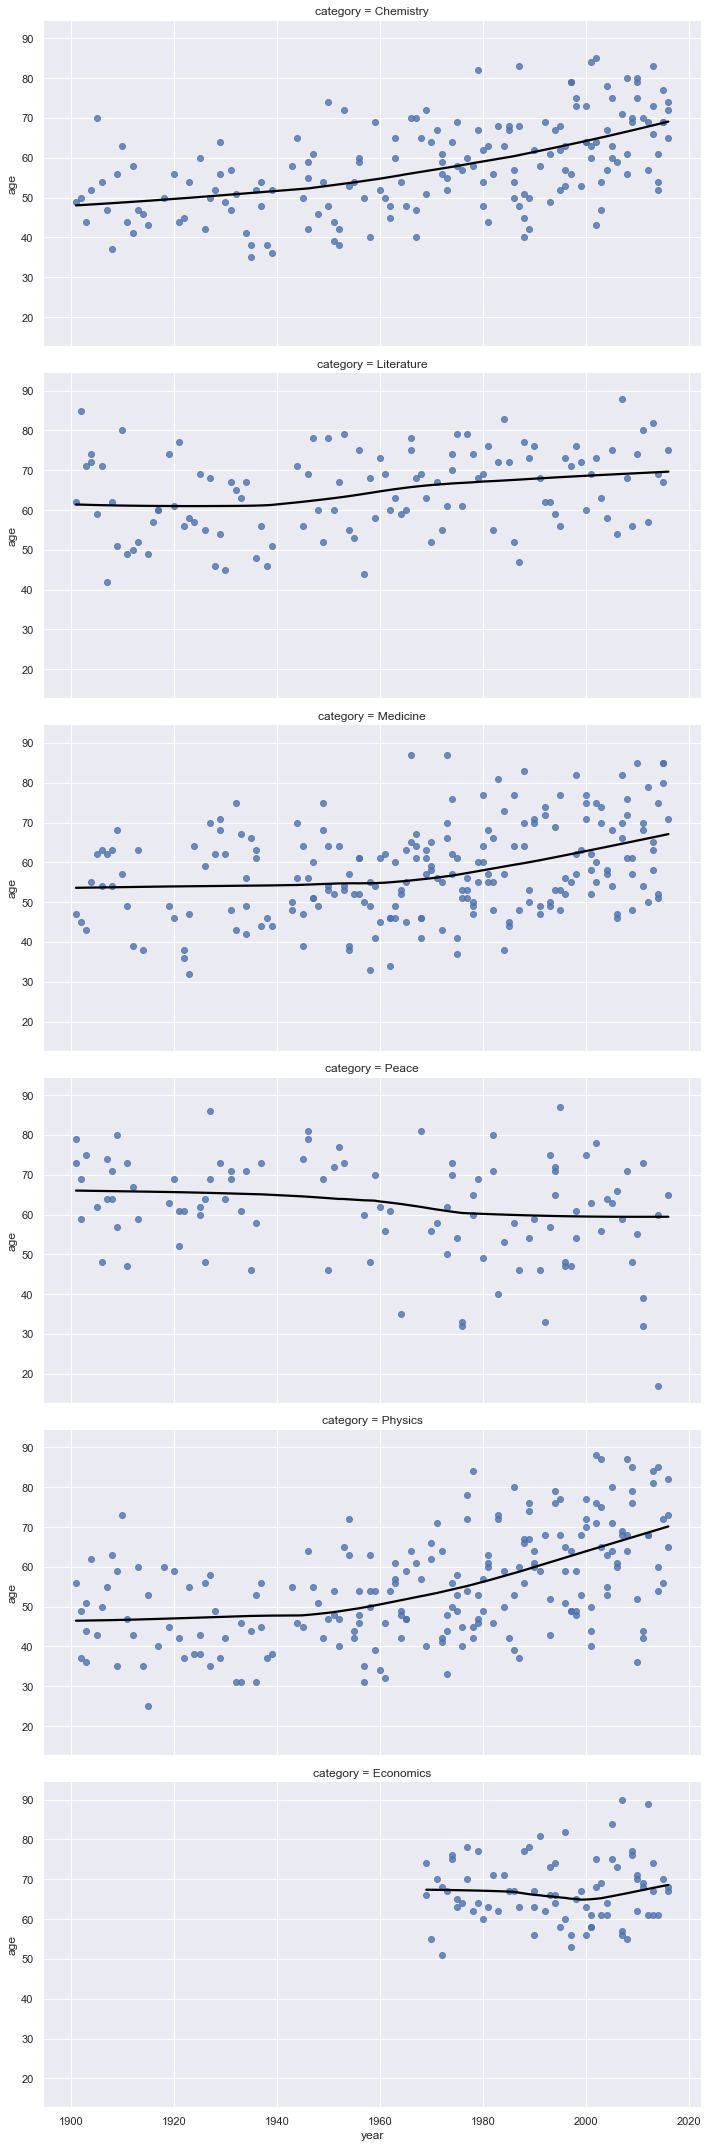

In [8]:
# Same plot as above, but separate plots for each type of Nobel Prize
# Plotting the age of Nobel Prize winners
sns.lmplot(x= 'year', y= 'age', data= nobel, row = 'category', lowess=True, aspect=2, line_kws={'color':'black'} )

In [9]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
display(nobel.nsmallest(1,'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2007,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2014,True,17.0
